# HTW Berlin - Angewandte Informatik - Advanced Topics - Exercise - Entropy

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge)
  * [Modules](#Python-Modules)
* [Exercise - Entropy](#Exercise---Entropy)
  * [Exercise - Entropy](#Exercise---Entropy)
  * [Exercise - KL Divergence](#Exercise---KL-Divergence)
* [Literature](#Literature)
* [Licenses](#Licenses)

## Introduction

In this notebook you will calculate the entropy of a probability mass function (pmf) and use the KL Divergence to measure the quality of an approximation of a probability density function.

In order to detect errors in your own code, execute the notebook cells containing `assert` or `assert_almost_equal`. These statements raise exceptions, as long as the calculated result is not yet correct.

## Requirements

### Knowledge

To complete this exercise notebook you should possess knowledge about the following topics.
* Proability mass function (pmf)
* Proability density function (pdf)
* Entropy
* Expected value (**Exercise - Expected Value**)
* KL Divergence (Kullback–Leibler)

The following literature can help you to acquire this knowledge:
* Read Chapter 3 "Probability and Information Theory" of the [Deep Learning Book](http://www.deeplearningbook.org/)
* Read Chapter 2.4 to 2.6 in David MacKays Book http://www.inference.org.uk/itprnn/book.html


### Python Modules

In [1]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from numpy.testing import assert_almost_equal

%matplotlib inline

## Exercise - Entropy

### Exercise - Entropy

At a party you are offered a free drink $x$ by playing a special roulette game. With probability 40% you receive 1 of 3 possible kinds of beer. 30% for 1 of 5 possible kinds of wine, 20% for 1 of 10 different kinds of schnapps and with a probability of 10% you receive vinegar. The  different kinds in each of those categories (beer, wine, ...) are uniformly distributed.

**Task:**

Estimate the entropy $X$ of your drink in bits.

**Reminder**:
$$
H(X) = \sum_{x \in \mathcal A x} P(x) \log_2 \frac{1}{P(x)}
$$

or

$$
H(X) = - \sum_{x \in \mathcal A x} P(x) \log_2 P(x)
$$

In [29]:
- (1/3)* np.log2(1/3)- (1/3)* np.log2(1/3)- (1/3)* np.log2(1/3)

1.5849625007211561

In [30]:
3 * (- (1/3)* np.log2(1/3))

1.5849625007211561

In [23]:
beer = 3 * (- (1/3)* np.log2(1/3))
print(beer)

1.58496250072


In [81]:
# Complete this cell

dictionary = {
    'beer' : [0.40, 1/3  ],
    'wine' : [0.30, 1/5],
    'schnapps' :  [0.20, 1/10 ],
    'vinegar' : [0.10, 1]
    }

hX = 0

for i in dictionary:
    hX = hX - (dictionary[i][0] * np.log2(dictionary[i][1] * dictionary[i][0]))
    
print(hX)

3.8413883924


In [84]:
# Executing this cell must not throw an Exception
# The solution is obfuscated so you can solve the exercise without unintendedly spoiling yourself

obfuscated_solution = 126361276584.6638/32894689023
print(obfuscated_solution)
assert_almost_equal(hX, obfuscated_solution)

3.8413883924031587


### Exercise - KL Divergence

Given are three probability density functions $p(x), q(x), pp(x)$ with support $[0,1[$.

In [2]:
np.random.seed(42)

a = np.random.rand(10)
b = np.random.rand(15)
ag = ss.gaussian_kde(a)
bg = ss.gaussian_kde(b)
k = np.linspace(0, 1, 10)
p = ag(k) # pdf
q = bg(k) # pdf

In [3]:
print(q)

[ 0.61762599  1.10351675  1.46843422  1.50242202  1.24399732  0.87710866
  0.57309509  0.42245917  0.36423327  0.27569156]


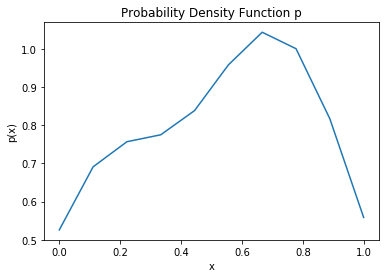

In [4]:
plt.plot(k, p)
plt.title("Probability Density Function p")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

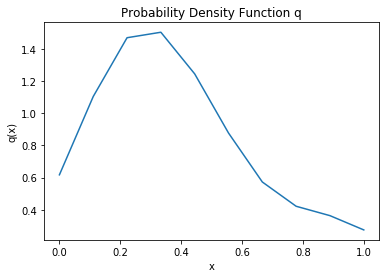

In [5]:
plt.plot(k, q)
plt.title("Probability Density Function q")
plt.xlabel("x")
plt.ylabel("q(x)")
plt.show()

In [6]:
pp = np.ones_like(p) * 2.
pp[k>0.5] = 0. # pdf

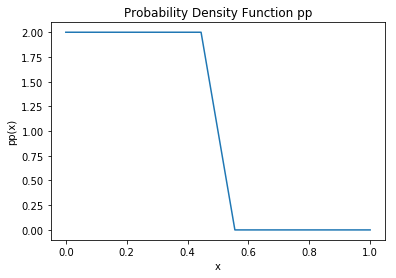

In [7]:
plt.plot(k, pp)
plt.title("Probability Density Function pp")
plt.xlabel("x")
plt.ylabel("pp(x)")
plt.show()

**Task:**

Write a function for computing the KL Divergence for such a pdf (probability density function)
in pure numpy. In order to successfully pass the tests, use the natural logarithm.

**Reminder:**

For probability mass functions / for discrete values:

$$
D_{KL}(Q \mid \mid P) = \sum_{x \in \mathcal A x} Q(x) \log \frac{Q(x)}{P(x)}
$$

For probability density functions / for continous values:

$$
D_{KL}(Q \mid \mid P) = \int_{-\infty}^{+\infty} q(x) \log \frac{q(x)}{p(x)} dx
$$

**Hint:**

KL Divergence might not be defined for all elements in $p(x), q(x), pp(x)$. Find a workaround so your function still returns a useful value.

In [195]:
# Implement this function
from scipy.integrate import quad

def kl_div(q, p):
    """Calculates the KL Divergence D(q||p). 
    
    :param q: values for the function q (true function)
    :type q: ndarray containing n values of type float
    :param p: values for the function p (approximation of q)
    :type p: ndarray containing n values of type float

    :returns: KL Divergence D(q||p) or np.infty if not possible
    :rtype: float
    """
    def integran(x,q,p):
        return np.where(q != 0, q * np.log(q / p), 0)
    
    return quad(integran, 0, 1, args=(q,p))
    

In [114]:
def kl_div(q, p):
    """Calculates the KL Divergence D(q||p). 
    
    :param q: values for the function q (true function)
    :type q: ndarray containing n values of type float
    :param p: values for the function p (approximation of q)
    :type p: ndarray containing n values of type float

    :returns: KL Divergence D(q||p) or np.infty if not possible
    :rtype: float
    """
    def integran(q,p):
        
        q = q / np.sum(q)
        p = p / np.sum(p) 
        return [ i * np.log(i / j) for i,j in zip(q,p) if i != 0 and j != 0]
    
    if(np.sum(integran(q,p)) < 0):
        return np.inf
    return np.sum(integran(q,p))

In [115]:
kl_div(p,pp)

inf

In [117]:
# Executing this cell must not throw an AssertionError

assert_almost_equal(kl_div(q, p), ss.entropy(q, p))
assert_almost_equal(kl_div(pp, p), ss.entropy(pp, p))
assert_almost_equal(kl_div(pp, q), ss.entropy(pp, q))
assert_almost_equal(kl_div(p, pp), np.infty)

**Task:**

1. Explain why it's  possible to calculate `kl_div(pp, p)`,
 but not `kl_div(p, pp)`.
 
2. Which value is larger `kl_div(pp, p)` or `kl_div(pp, q)`? What do you expect? Why?

## Literature

<table>
    <tr>
        <td>
            <a name="MAC03"></a>[MAC03]
        </td>
        <td>
            MacKay, David JC, and David JC Mac Kay. Information theory, inference and learning algorithms. Cambridge university press, 2003.
        </td>
    </tr>
    <tr>
        <td>
            <a name="GOO16"></a>[GOO16]
        </td>
        <td>
            Goodfellow, Ian, et al. Deep learning. Vol. 1. Cambridge: MIT press, 2016.
        </td>
    </tr>
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

HTW Berlin - Angewandte Informatik - Advanced Topics - Exercise - Entropy <br/>
by Christian Herta, Klaus Strohmenger<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.